### **Import Library:** 분석에 사용할 모듈 설치

In [1]:
# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Datasets
from sklearn.datasets import load_iris, load_breast_cancer

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for classification
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics.cluster import silhouette_score

In [2]:
# Classification Measure 함수화
def measures_cluster(Y, X, Y_pred):
    measures = [silhouette_score(X, Y_pred),
                adjusted_rand_score(Y, Y_pred), 
                adjusted_mutual_info_score(Y, Y_pred)]
    measures = pd.DataFrame(measures, index=['Silhouette', 'ARI', 'AMI'], columns=['Score']).T
    
    return measures

# Confusion Matrix 함수화
def evaluation_class_ConfusionMatrix(Y_true, Y_pred):
    conf_mat = confusion_matrix(Y_true, Y_pred)
    index_name = ['True '+ str(i) for i in np.unique(np.array(Y_true))]
    column_name = ['Pred '+ str(i) for i in np.unique(np.array(Y_true))]
    conf_mat = pd.DataFrame(conf_mat, index=index_name, columns=column_name)
    
    return conf_mat

# Classification Report 함수화
def evaluation_class_ClassificationReport(Y_true, Y_pred):
    print(classification_report(Y_true, Y_pred, 
                                target_names=['class 0', 'class 1']))


# ROC Curve & AUC 함수화
def evaluation_class_ROCAUC(Y_true, P_pred, figsize=(10,5), label='Logistic Regression'):
    fpr, tpr, thresholds = roc_curve(Y_true, P_pred)
    cm = evaluation_class_ConfusionMatrix(Y_true, P_pred>=0.5)
    recall = cm.iloc[1,1] / cm.sum(axis=1).values[1]
    fallout = cm.iloc[0,1] / cm.sum(axis=1).values[0]
    
    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1],'r--')
    plt.plot([fallout], [recall], 'ro', ms=10)
    plt.title('AUC: ' + str(auc(fpr, tpr)), fontsize=15)
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid()
    plt.show()

#### **K-centroid Clustering**

#### 붓꽃분류 데이터

In [3]:
# 예제 데이터 로딩
iris = load_iris()
columns_origin = ['_'.join(i.split(' (cm)')[0].split(' ')).capitalize() for i in iris.feature_names]
X = pd.DataFrame(iris.data, columns=columns_origin)
Y = iris.target
display(X, pd.DataFrame(Y, columns=['Flower_Name']))

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20
...,...,...,...,...
145,6.70,3.00,5.20,2.30
146,6.30,2.50,5.00,1.90
147,6.50,3.00,5.20,2.00
148,6.20,3.40,5.40,2.30


,Flower_Name
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


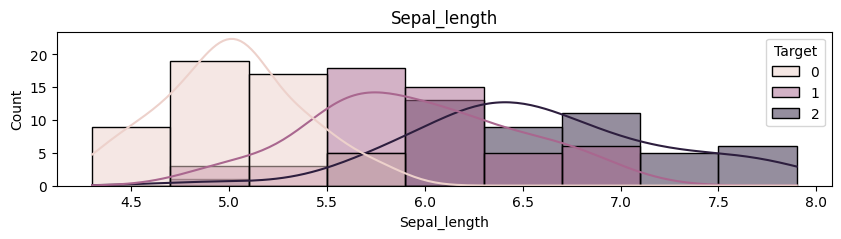

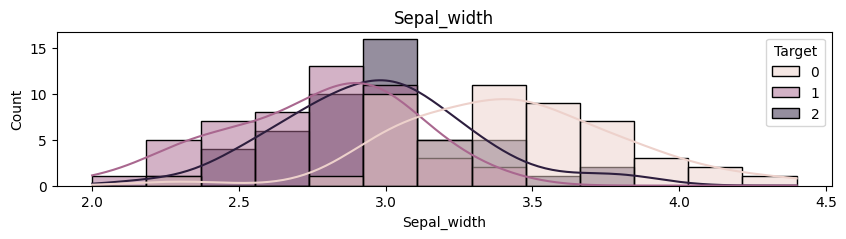

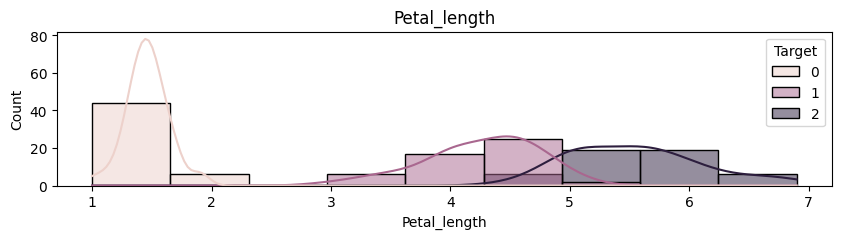

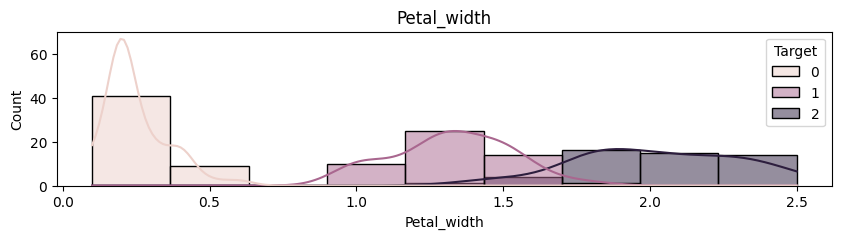

In [4]:
# 변수가 많은 고차원 데이터를 시각화 하는 것은 쉽지 않음
# 분류 여부에 따른 변수별 분포(히스토그램)를 통해 영향력을 확인하는 것이 일반적
for col in X.columns:
    plt.figure(figsize=(10,2))
    sns.histplot(data=pd.concat([pd.DataFrame(Y, columns=['Target']), X], axis=1), 
                 x=col, hue='Target', kde=True)
    plt.title(col)
    plt.show()

In [5]:
# 스케일링
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).describe()

,0,1,2,3
count,150.00,150.00,150.00,150.00
mean,0.43,0.44,0.47,0.46
std,0.23,0.18,0.30,0.32
min,0.00,0.00,0.00,0.00
25%,0.22,0.33,0.10,0.08
50%,0.42,0.42,0.57,0.50
75%,0.58,0.54,0.69,0.71
max,1.00,1.00,1.00,1.00


In [6]:
# 모델링
model_kmeans = KMeans(n_clusters=3, random_state=42)
model_kmeans.fit(X)
Y_pred = model_kmeans.predict(X)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [7]:
# 성능확인
measures_cluster(Y, X, Y_pred)

,Silhouette,ARI,AMI
Score,0.48,0.70,0.71


In [8]:
# Confusion Matrix 확인
evaluation_class_ConfusionMatrix(Y, Y_pred)

,Pred 0,Pred 1,Pred 2
True 0,0,50,0
True 1,10,0,40
True 2,42,0,8


#### 유방암 생준분류 데이터

In [9]:
# 예제 데이터 로딩
# 예측치 라벨링 순서가 어떻게 될지 몰라서 순서를 맞추기 위해 Y라벨을 오름차순으로 정렬
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
Y = pd.DataFrame(cancer.target, columns=['Target'])
df = pd.concat([Y, X], axis=1).sort_values(by='Target').reset_index().iloc[:,1:]
Y = np.ravel(df['Target'])
X = df.iloc[:,1:]
display(X, Y)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,"1,001.00",0.12,0.28,0.30,0.15,0.24,0.08,...,25.38,17.33,184.60,"2,019.00",0.16,0.67,0.71,0.27,0.46,0.12
1,20.57,17.77,132.90,"1,326.00",0.08,0.08,0.09,0.07,0.18,0.06,...,24.99,23.41,158.80,"1,956.00",0.12,0.19,0.24,0.19,0.28,0.09
2,19.69,21.25,130.00,"1,203.00",0.11,0.16,0.20,0.13,0.21,0.06,...,23.57,25.53,152.50,"1,709.00",0.14,0.42,0.45,0.24,0.36,0.09
3,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,20.29,14.34,135.10,"1,297.00",0.10,0.13,0.20,0.10,0.18,0.06,...,22.54,16.67,152.20,"1,575.00",0.14,0.20,0.40,0.16,0.24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,10.17,14.88,64.55,311.90,0.11,0.08,0.01,0.01,0.27,0.07,...,11.02,17.45,69.86,368.60,0.13,0.10,0.02,0.03,0.36,0.08
565,9.50,12.44,60.34,273.90,0.10,0.06,0.03,0.02,0.18,0.07,...,10.23,15.66,65.13,314.90,0.13,0.11,0.09,0.06,0.24,0.08
566,13.08,15.71,85.63,520.00,0.11,0.13,0.05,0.03,0.20,0.07,...,14.50,20.49,96.09,630.50,0.13,0.28,0.19,0.07,0.32,0.08
567,7.76,24.54,47.92,181.00,0.05,0.04,0.00,0.00,0.16,0.06,...,9.46,30.37,59.16,268.60,0.09,0.06,0.00,0.00,0.29,0.07


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

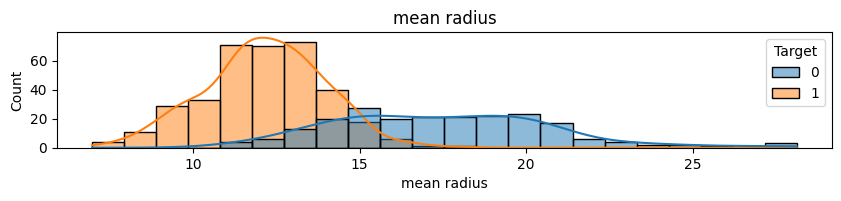

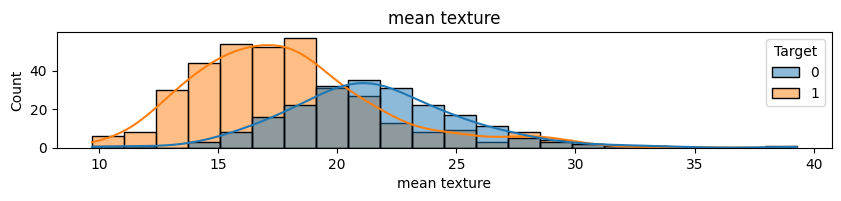

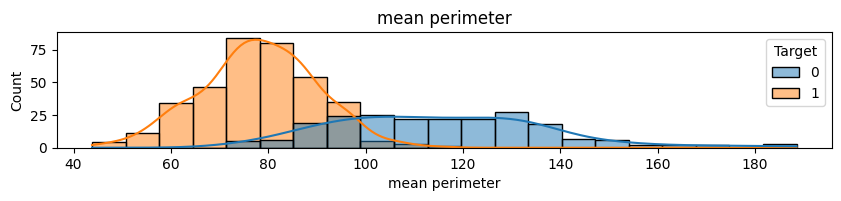

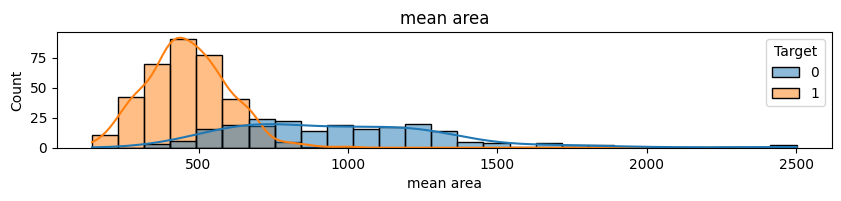

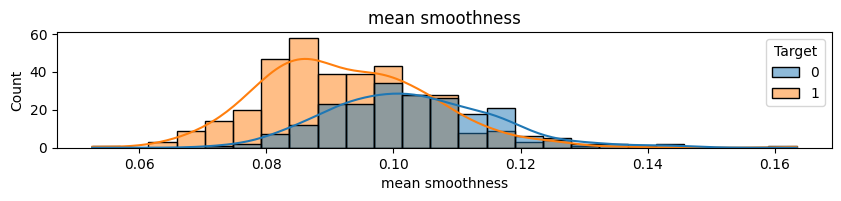

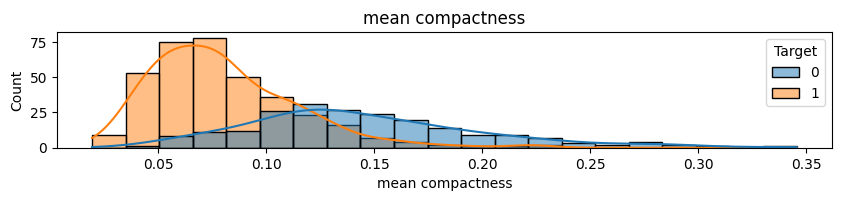

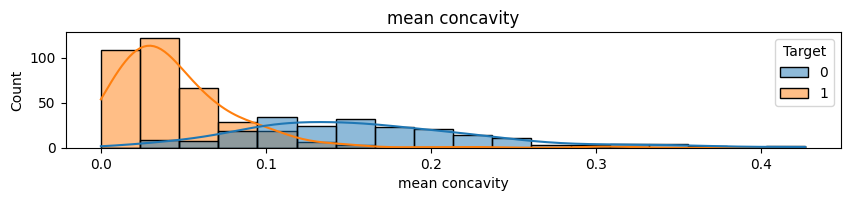

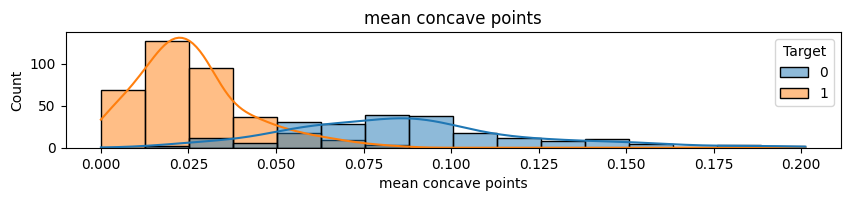

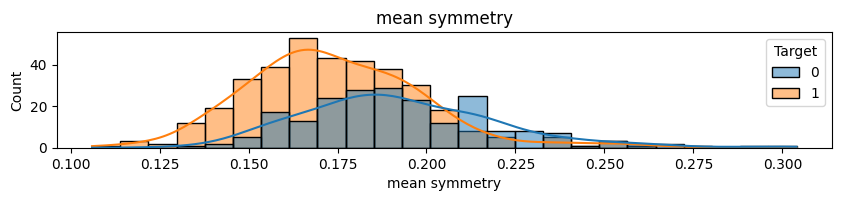

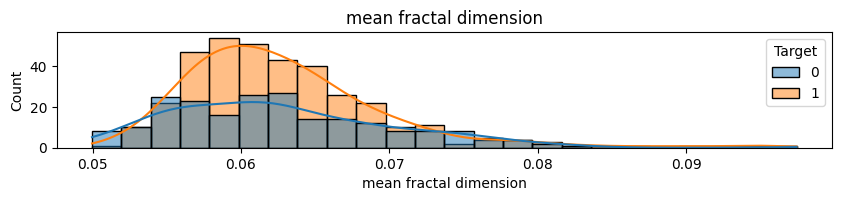

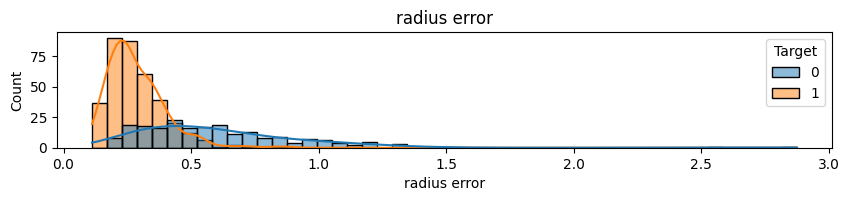

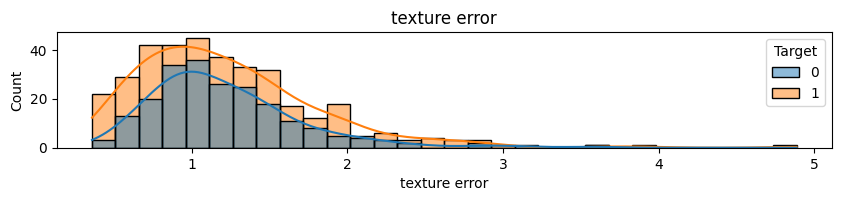

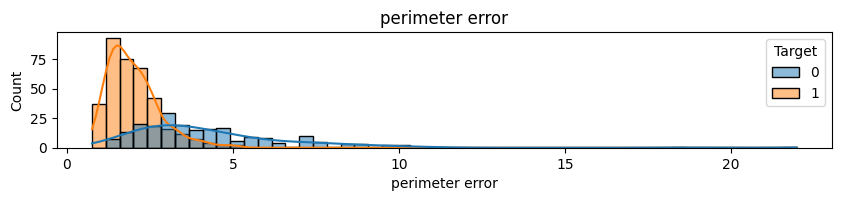

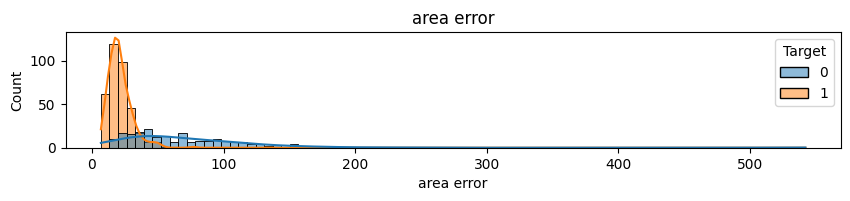

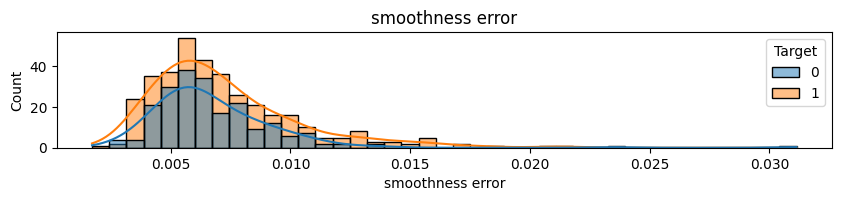

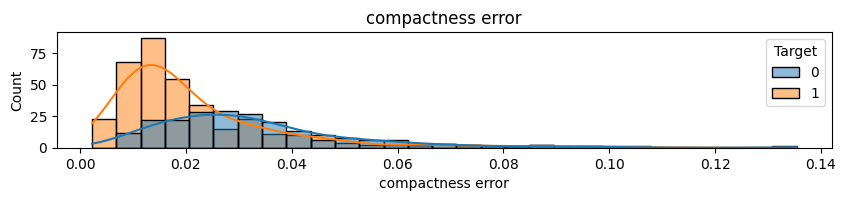

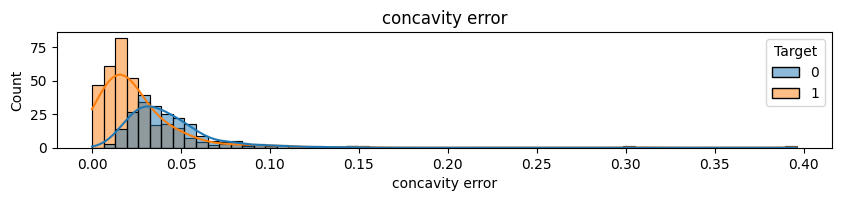

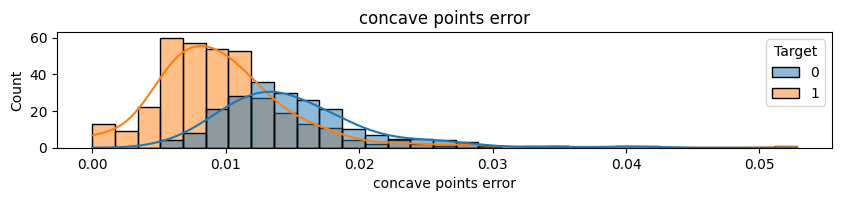

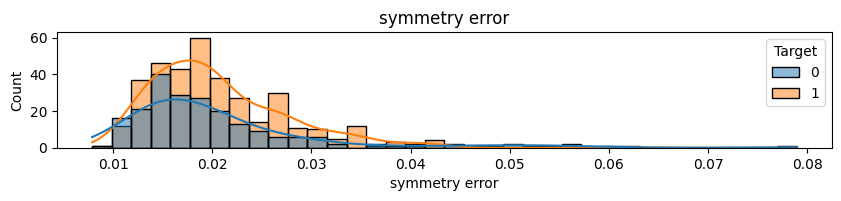

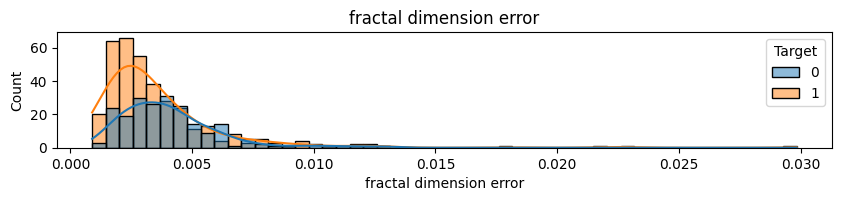

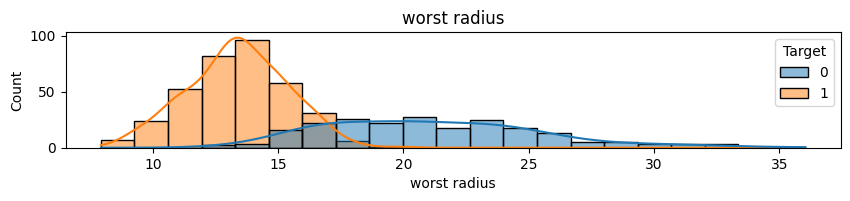

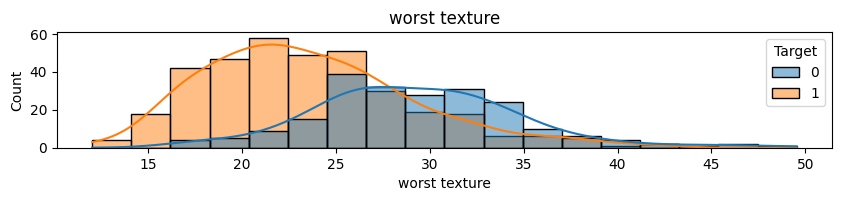

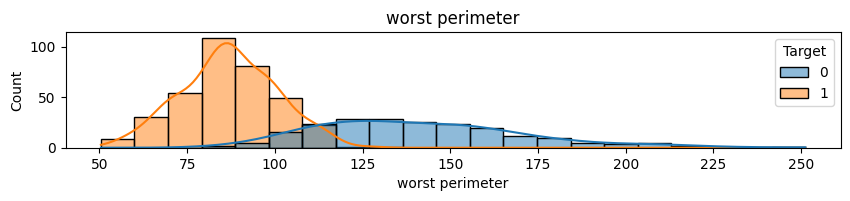

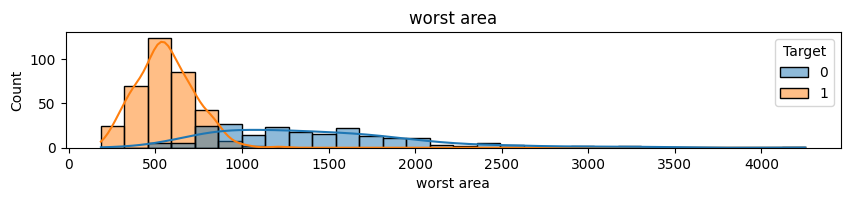

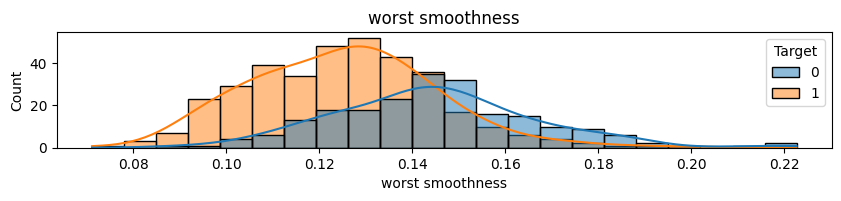

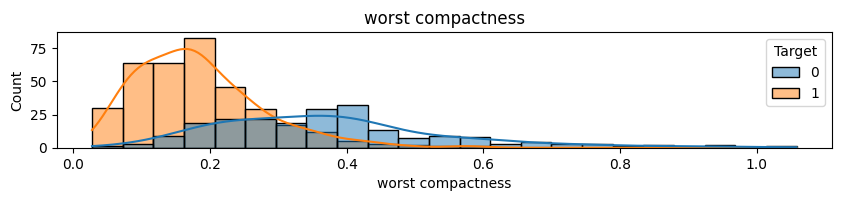

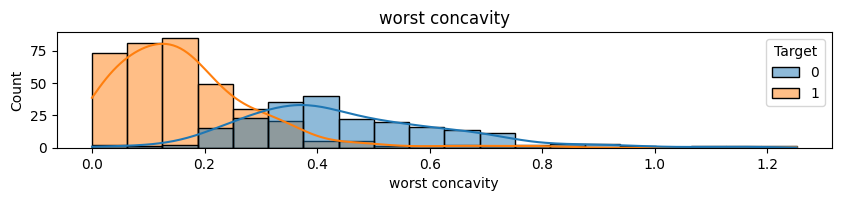

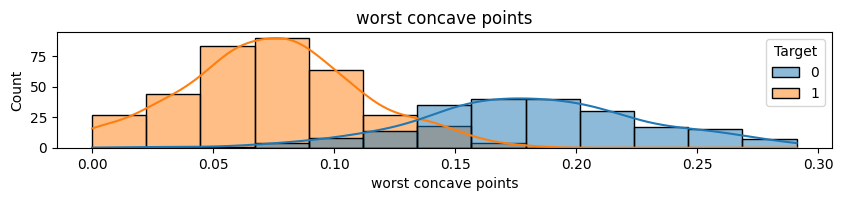

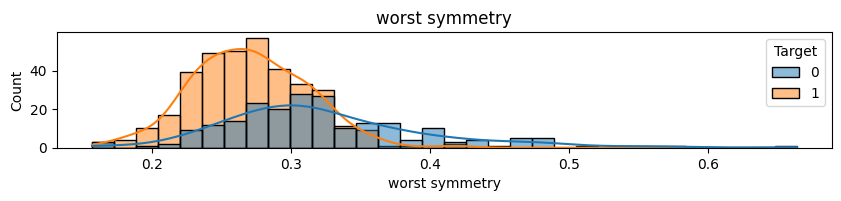

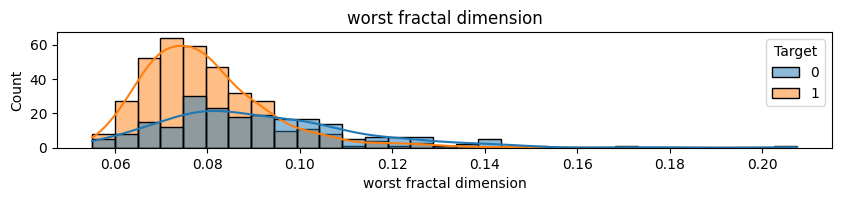

In [10]:
# 변수가 많은 고차원 데이터를 시각화 하는 것은 쉽지 않음
# 분류 여부에 따른 변수별 분포(히스토그램)를 통해 영향력을 확인하는 것이 일반적
for col in X.columns:
    plt.figure(figsize=(10,1.5))
    sns.histplot(data=df, x=col, hue='Target', kde=True)
    plt.title(col)
    plt.show()

In [11]:
# 스케일링
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,...,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.03,-2.23,-1.98,-1.45,-3.11,-1.61,-1.11,-1.26,-2.74,-1.82,...,-1.73,-2.22,-1.69,-1.22,-2.68,-1.44,-1.31,-1.75,-2.16,-1.60
25%,-0.69,-0.73,-0.69,-0.67,-0.71,-0.75,-0.74,-0.74,-0.70,-0.72,...,-0.67,-0.75,-0.69,-0.64,-0.69,-0.68,-0.76,-0.76,-0.64,-0.69
50%,-0.22,-0.10,-0.24,-0.30,-0.03,-0.22,-0.34,-0.40,-0.07,-0.18,...,-0.27,-0.04,-0.29,-0.34,-0.05,-0.27,-0.22,-0.22,-0.13,-0.22
75%,0.47,0.58,0.50,0.36,0.64,0.49,0.53,0.65,0.53,0.47,...,0.52,0.66,0.54,0.36,0.60,0.54,0.53,0.71,0.45,0.45
max,3.97,4.65,3.98,5.25,4.77,4.57,4.24,3.93,4.48,4.91,...,4.09,3.89,4.29,5.93,3.96,5.11,4.70,2.69,6.05,6.85


In [12]:
# 모델링
model_kmeans = KMeans(n_clusters=2, random_state=123)
model_kmeans.fit(X)
Y_pred = model_kmeans.predict(X)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
# 성능확인
measures_cluster(Y, X, Y_pred)

,Silhouette,ARI,AMI
Score,0.34,0.68,0.56


In [14]:
# Confusion Matrix 확인
evaluation_class_ConfusionMatrix(Y, Y_pred)

,Pred 0,Pred 1
True 0,37,175
True 1,344,13


In [15]:
# Classification Report 확인
evaluation_class_ClassificationReport(Y, Y_pred)

              precision    recall  f1-score   support

     class 0       0.10      0.17      0.12       212
     class 1       0.07      0.04      0.05       357

    accuracy                           0.09       569
   macro avg       0.08      0.11      0.09       569
weighted avg       0.08      0.09      0.08       569



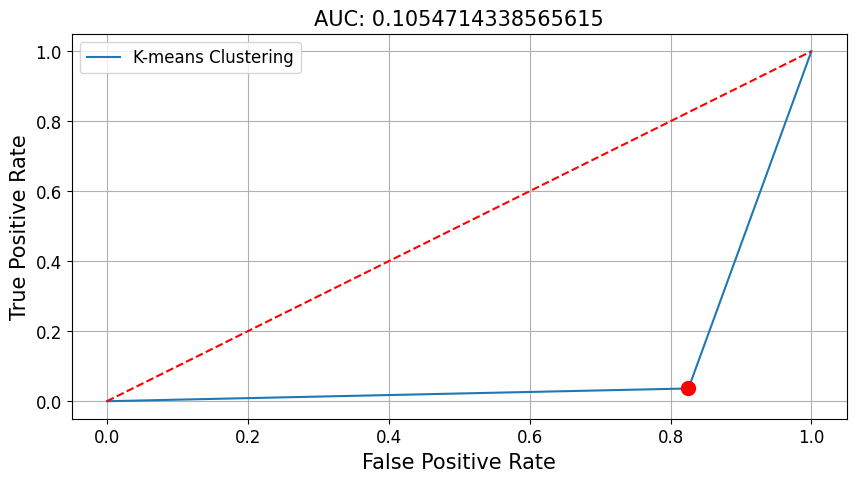

In [16]:
# ROC Curve & AUC 확인
evaluation_class_ROCAUC(Y, Y_pred, label='K-means Clustering')

#### 타이타닉 생존분류 데이터

In [17]:
# 결측값 처리
def fillnull(df):
    ## Age
    df_agem = df[df.Sex == 'male']
    df_agem = df_agem[['Age']].fillna(df_agem[['Age']].mean())

    df_agefm = df[df.Sex == 'female']
    df_agefm = df_agefm[['Age']].fillna(df_agefm[['Age']].mean())
    df[['Age']] = pd.concat([df_agem, df_agefm], axis=0).sort_index()

    ## Embarked
    df[['Embarked']] = df[['Embarked']].fillna(df['Embarked'].mode()[0], axis=0)

    ## Cabin
    df['Cabin'] = df['Cabin'].str.slice(0,1)
    df['Cabin'] = df['Cabin'].fillna('Temp')
    
    return df


# 데이터 정리
def prep(df):
    # Name
    name_sub = df['Name'].str.split(',', expand=True)[1]
    name_sub = name_sub.str.split('. ', expand=True)[0]
    name_sub.replace([' Mr'], 'Mr', inplace=True)
    name_sub.replace([' Mrs'], 'Mrs', inplace=True)
    name_sub.replace([' Ms', ' Miss'], 'Miss', inplace=True)
    name_sub.replace([' Don', ' Mme', ' Lady', 'Sir', 'Mlle', ' th', ' Jonkheer'], 'Noble', inplace=True)
    name_sub.replace([' Master', ' Major', ' Col', ' Capt', ' Sir', ' Mlle'], 'Officer', inplace=True)
    name_sub.replace([' Dr', ' Rev'], 'Priest', inplace=True)
    df['Name'] = name_sub.copy()

    # Ticket
    df['Ticket'] = df['Ticket'].str.replace('.','').str.replace('/','')
    df['Ticket'] = df['Ticket'].str.strip().str.split(' ').str[0]
    df.loc[df['Ticket'].str.isdigit(), 'Ticket'] = 'NUM'

    # Age
    age_interval = [10, 20, 30, 40, 50, 60, 70, 80, 90]
    df['Age'] = np.digitize(df['Age'], bins=age_interval)
        
    return df


# 데이터 분리
def datasplit(df, Y_colname, test_size=0.2, random_state=123):
    X_colname = [x for x in df.columns if x not in Y_colname]
       
    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                        test_size=test_size, random_state=random_state)
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test


# 데이터 변환
def label_encoding(X_train, X_test, colname, encoder):
    X_train_le = X_train.copy()
    X_test_le = X_test.copy()
    
    for i in colname: # 대상 변수들마다
        encoder = encoder.fit(X_train[i])

        for label in X_test[i].unique():
            if label not in encoder.classes_:
                encoder.classes_ = np.append(encoder.classes_, label)

        X_train_le[i] = encoder.transform(X_train[i])
        X_test_le[i] = encoder.transform(X_test[i])
        
    return X_train_le, X_test_le


def onehot_encoding(df, colname):
    df_ohe = df.copy()
    
    for i in colname:
        if i in df.columns:
            df_ohe = pd.get_dummies(df_ohe, columns=[i], drop_first=True)
            
    return df_ohe


# 데이터 변환 후 X_train과 X_test의 변수 갯수 일치
def col_mapping(X_train, X_test):
    X_tr = X_train.copy()
    X_te = X_test.copy()
    
    # Train & Test 변수명 체크
    X_te_noncol = [i for i in X_tr.columns if i not in X_te.columns]
    X_tr_noncol = [i for i in X_te.columns if i not in X_tr.columns]

    # 변수 갯수 일치
    if X_te_noncol != []:
        for i in X_te_noncol:
            X_te[i] = 0
            X_te = X_te[X_tr.columns].copy()
            
    if X_tr_noncol != []:
        for i in X_tr_noncol:
            X_tr[i] = 0
            X_tr = X_tr[X_te.columns].copy()
            
    return X_tr, X_te


# 스케일 조정
def scale(scaler, X_train, X_test):
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train),
                                   index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                                  index=X_test.index, columns=X_test.columns)
    
    return X_train_scaling, X_test_scaling

In [18]:
# 데이터 로딩
df = pd.read_csv('./data/Titanic.csv')

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.StandardScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

(712, 11) (712, 1)
(179, 11) (179, 1)


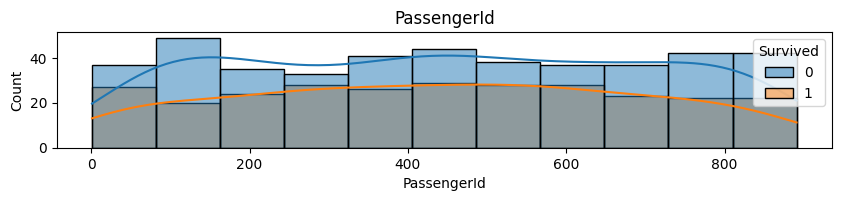

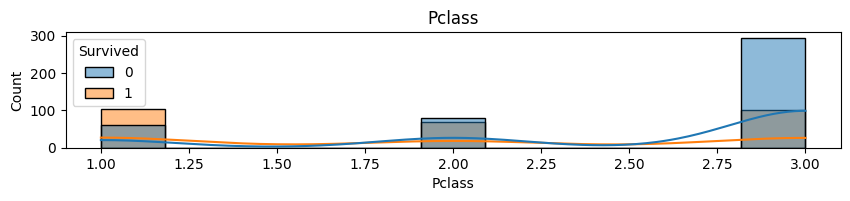

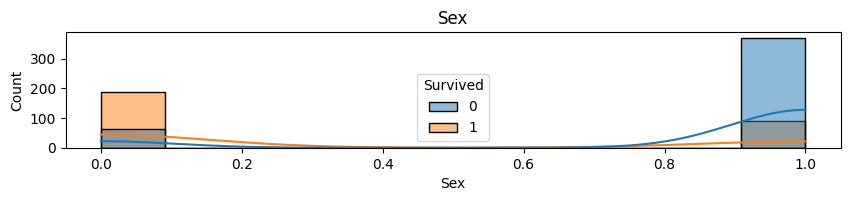

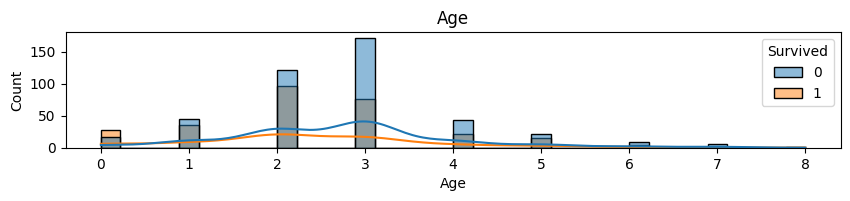

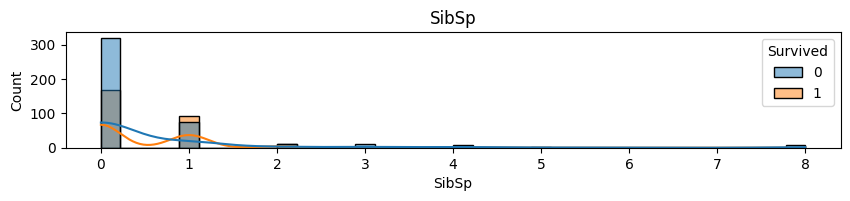

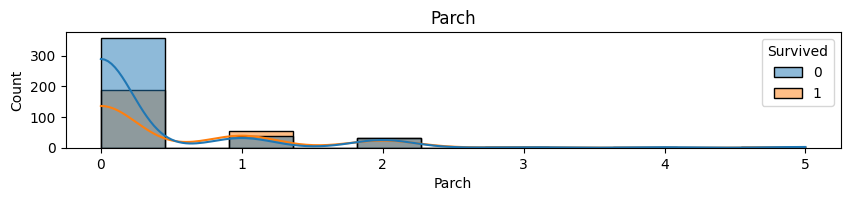

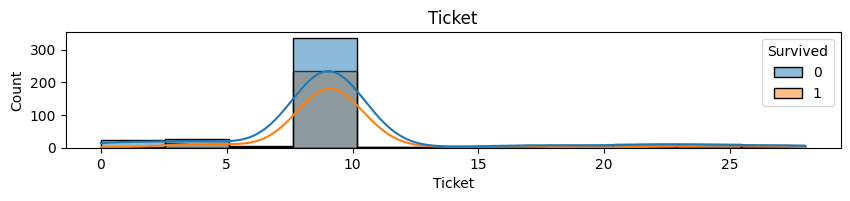

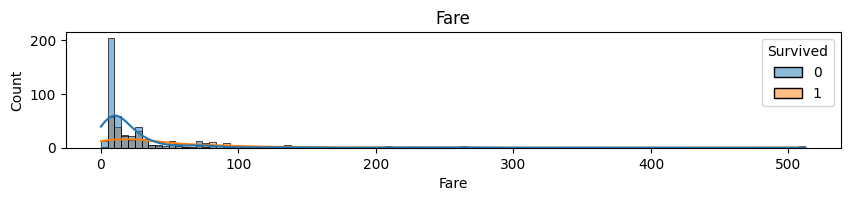

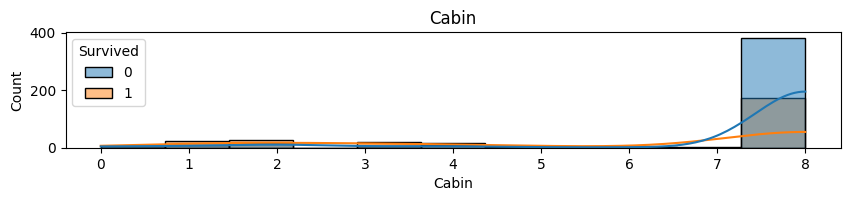

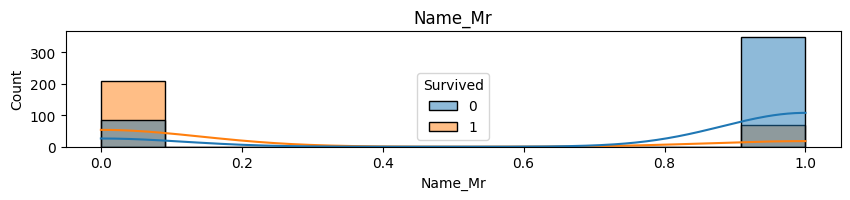

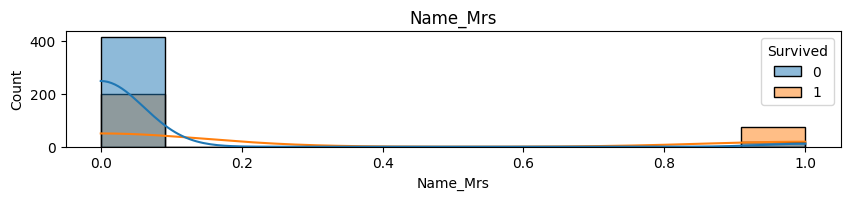

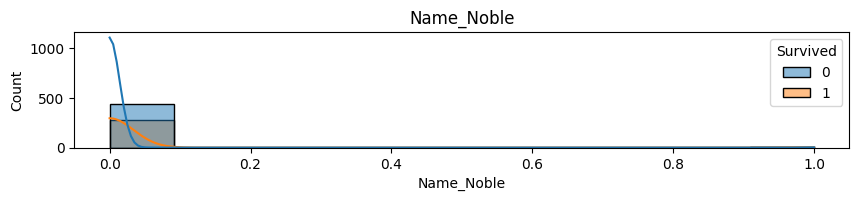

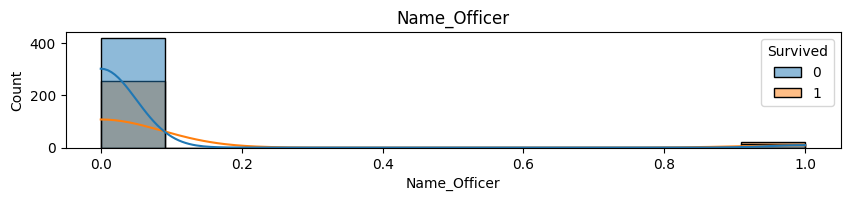

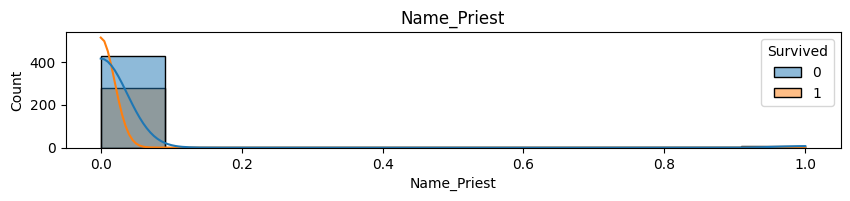

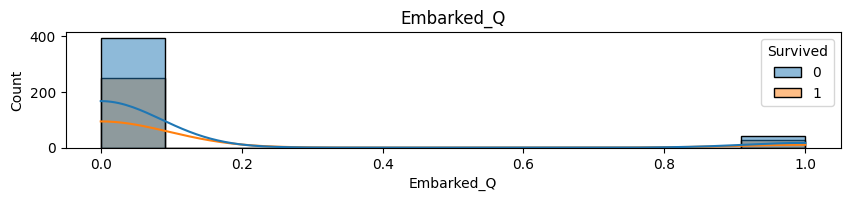

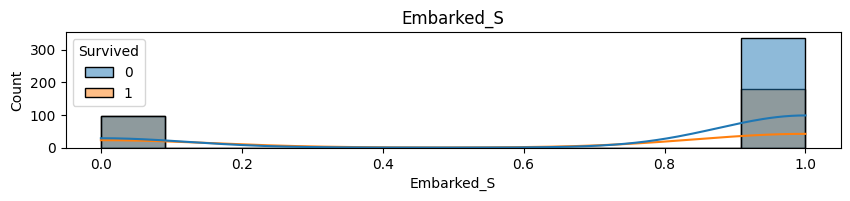

In [19]:
# 변수가 많은 고차원 데이터를 시각화 하는 것은 쉽지 않음
# 분류 여부에 따른 변수별 분포(히스토그램)를 통해 영향력을 확인하는 것이 일반적
for col in X_train_fe.columns:
    plt.figure(figsize=(10,1.5))
    sns.histplot(data=pd.concat([Y_train, X_train_fe], axis=1), x=col, hue=Y_colname[0], kde=True)
    plt.title(col)
    plt.show()

In [20]:
# 모델링
model_kmeans = KMeans(n_clusters=2, random_state=123)
model_kmeans.fit(X_train_fes)
Y_trpred = model_kmeans.predict(X_train_fes)
Y_tepred = model_kmeans.predict(X_test_fes)

In [21]:
# Train 성능확인
measures_cluster(np.ravel(Y_train), X_train_fes, Y_trpred)

,Silhouette,ARI,AMI
Score,0.23,0.11,0.07


In [22]:
# Confusion Matrix 확인
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)

,Pred 0,Pred 1
True 0,382,53
True 1,176,101


In [23]:
# Test 성능확인
measures_cluster(np.ravel(Y_test), X_test_fes, Y_tepred)

,Silhouette,ARI,AMI
Score,0.21,0.20,0.12


In [24]:
# Confusion Matrix 확인
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

,Pred 0,Pred 1
True 0,99,15
True 1,33,32


In [25]:
# Classification Report 확인
evaluation_class_ClassificationReport(Y_train, Y_trpred)
evaluation_class_ClassificationReport(Y_test, Y_tepred)

              precision    recall  f1-score   support

     class 0       0.68      0.88      0.77       435
     class 1       0.66      0.36      0.47       277

    accuracy                           0.68       712
   macro avg       0.67      0.62      0.62       712
weighted avg       0.67      0.68      0.65       712

              precision    recall  f1-score   support

     class 0       0.75      0.87      0.80       114
     class 1       0.68      0.49      0.57        65

    accuracy                           0.73       179
   macro avg       0.72      0.68      0.69       179
weighted avg       0.72      0.73      0.72       179



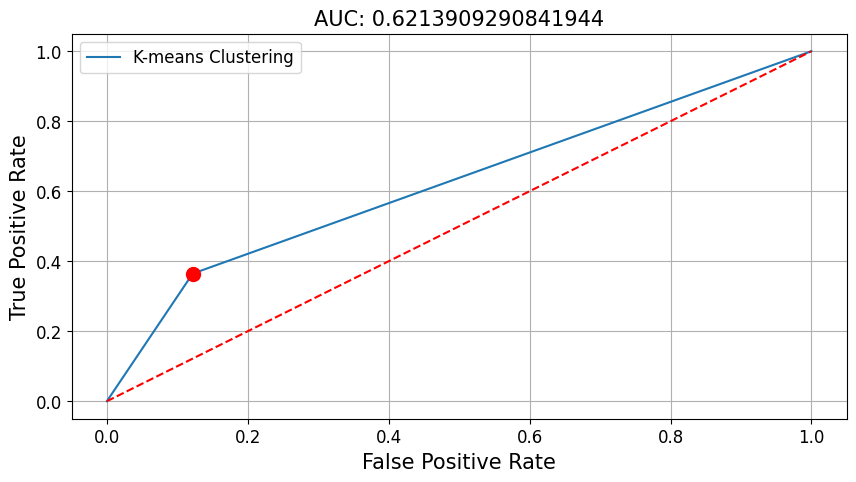

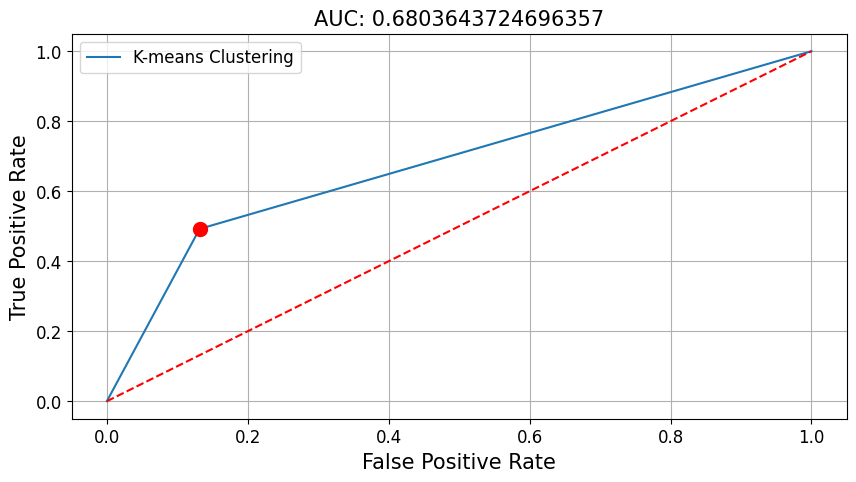

In [26]:
# ROC Curve & AUC 확인
evaluation_class_ROCAUC(Y_train, Y_trpred, label='K-means Clustering')
evaluation_class_ROCAUC(Y_test, Y_tepred, label='K-means Clustering')

#### Principal Component Analysis 추정

In [27]:
# 예제 데이터 로딩
iris = load_iris()
columns_origin = ['_'.join(i.split(' (cm)')[0].split(' ')).capitalize() for i in iris.feature_names]
X = pd.DataFrame(iris.data, columns=columns_origin)
Y = pd.DataFrame(iris.target, columns=['Target'])
df = pd.concat([Y, X], axis=1)
df

,Target,Sepal_length,Sepal_width,Petal_length,Petal_width
0,0,5.10,3.50,1.40,0.20
1,0,4.90,3.00,1.40,0.20
2,0,4.70,3.20,1.30,0.20
3,0,4.60,3.10,1.50,0.20
4,0,5.00,3.60,1.40,0.20
...,...,...,...,...,...
145,2,6.70,3.00,5.20,2.30
146,2,6.30,2.50,5.00,1.90
147,2,6.50,3.00,5.20,2.00
148,2,6.20,3.40,5.40,2.30


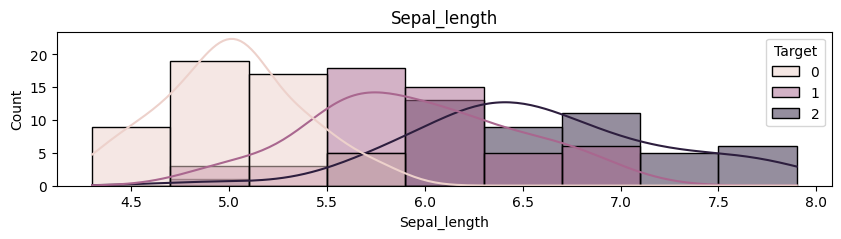

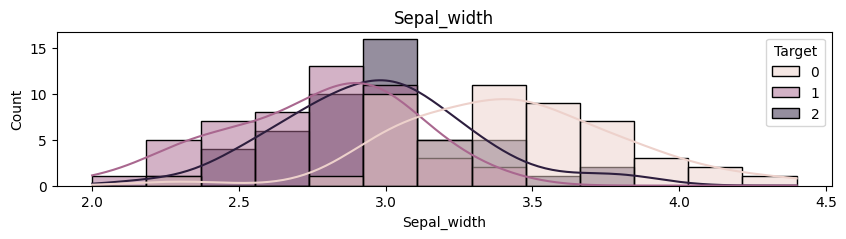

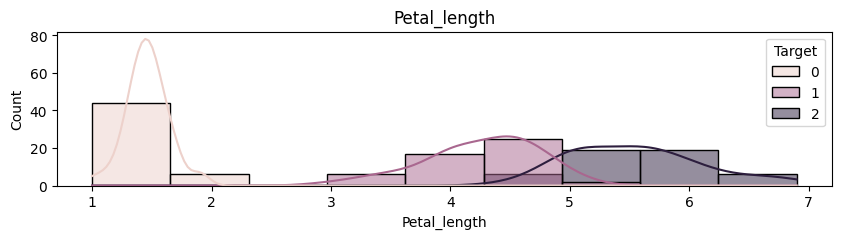

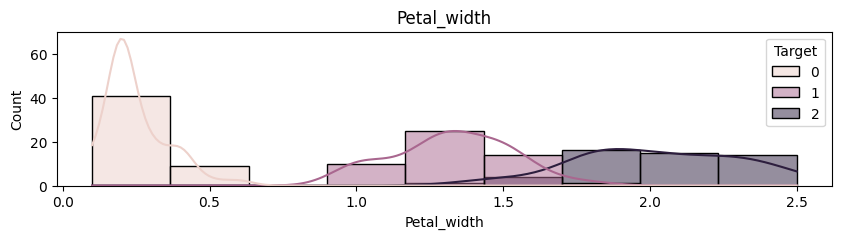

In [28]:
# 변수가 많은 고차원 데이터를 시각화 하는 것은 쉽지 않음
# 분류 여부에 따른 변수별 분포(히스토그램)를 통해 영향력을 확인하는 것이 일반적
for col in X.columns:
    plt.figure(figsize=(10,2))
    sns.histplot(data=pd.concat([pd.DataFrame(Y, columns=['Target']), X], axis=1), 
                 x=col, hue='Target', kde=True)
    plt.title(col)
    plt.show()

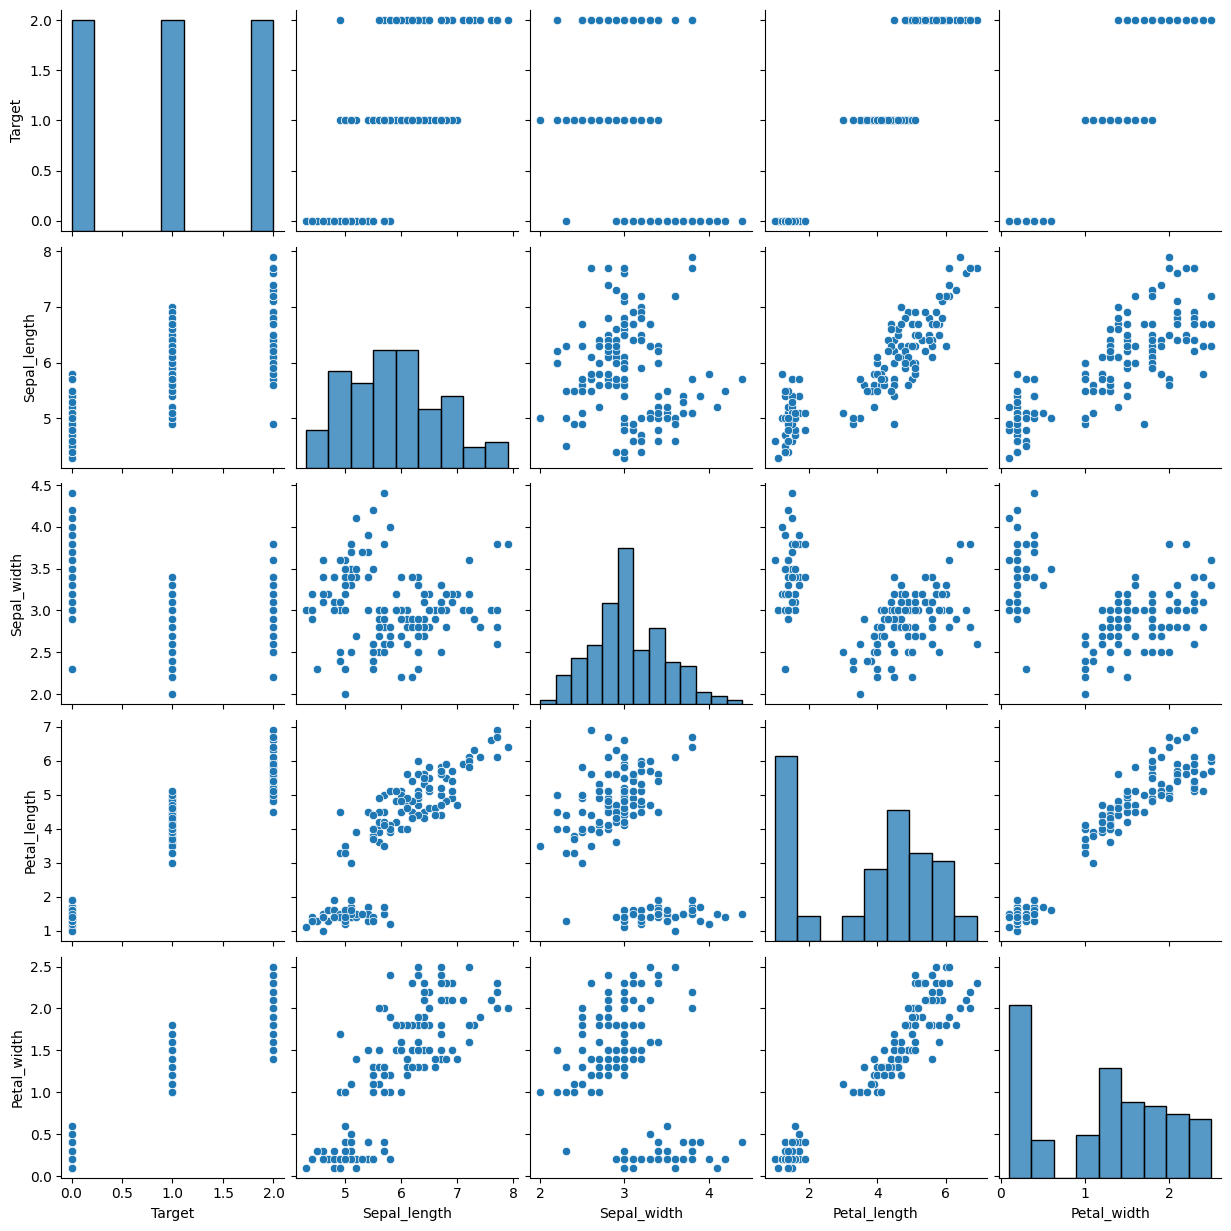

In [29]:
# seaborn 함수를 sns로 사용하여 pairplot 그리기
sns.pairplot(df)
plt.show()

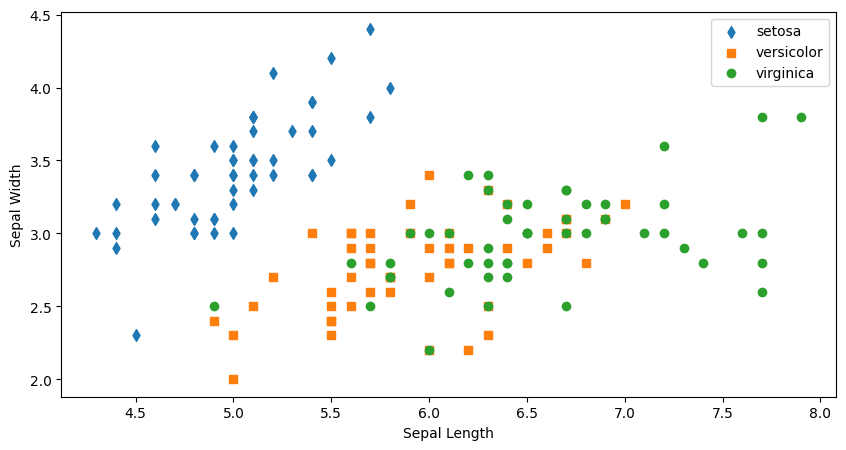

In [30]:
# Target에 따른 퍼진정도 확인
plt.figure(figsize=(10,5))

markers = ['d','s','o']
for i, marker in enumerate(markers):
    X_sub = df[df['Target']==i]['Sepal_length']
    Y_sub = df[df['Target']==i]['Sepal_width']
    plt.scatter(X_sub, Y_sub, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

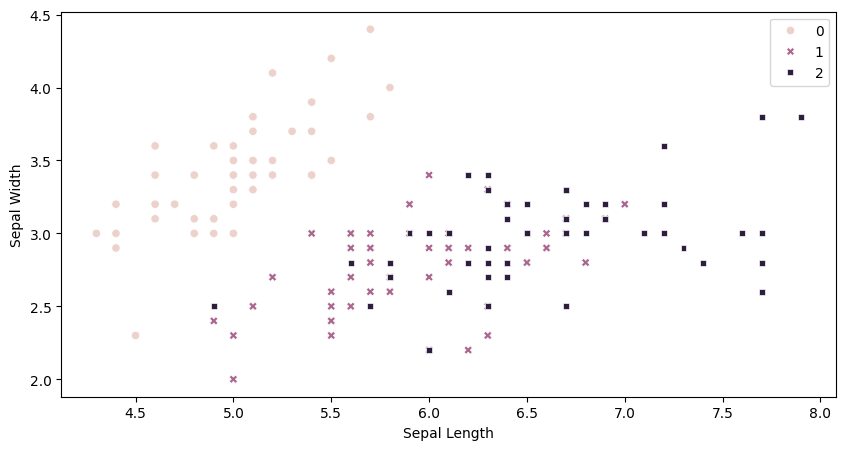

In [31]:
# Target에 따른 퍼진정도 확인
plt.figure(figsize=(10,5))
sns.scatterplot(x='Sepal_length', y='Sepal_width', data=df, 
                hue='Target', style='Target')
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [32]:
# 스케일링
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).describe()

,0,1,2,3
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.43,-1.57,-1.45
25%,-0.90,-0.59,-1.23,-1.18
50%,-0.05,-0.13,0.34,0.13
75%,0.67,0.56,0.76,0.79
max,2.49,3.09,1.79,1.71


In [33]:
# 4차원의 데이터의 주성분 추출
model_pca = PCA(n_components=4)
model_pca.fit(X)
X_pca = model_pca.transform(X)
X_pca

array([[-2.26470281e+00,  4.80026597e-01,  1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01,  2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01, -4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01, -9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01, -1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00, -2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02, -3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01,  8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00, -1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01,  2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00,  2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01, -9.37592444e-02,
      

In [34]:
# 고유벡터 = 데이터 분산을 최대화 하는 방향
model_pca.components_.T

array([[ 0.52106591,  0.37741762,  0.71956635, -0.26128628],
       [-0.26934744,  0.92329566, -0.24438178,  0.12350962],
       [ 0.5804131 ,  0.02449161, -0.14212637,  0.80144925],
       [ 0.56485654,  0.06694199, -0.63427274, -0.52359713]])

In [35]:
# 고유벡터 = 데이터 분산을 최대화 하는 방향
colnames = ['PC'+str(i) for i in range(1, X_pca.shape[1]+1)]
pd.DataFrame(model_pca.components_.T, columns=colnames, index=columns_origin)

,PC1,PC2,PC3,PC4
Sepal_length,0.52,0.38,0.72,-0.26
Sepal_width,-0.27,0.92,-0.24,0.12
Petal_length,0.58,0.02,-0.14,0.80
Petal_width,0.56,0.07,-0.63,-0.52


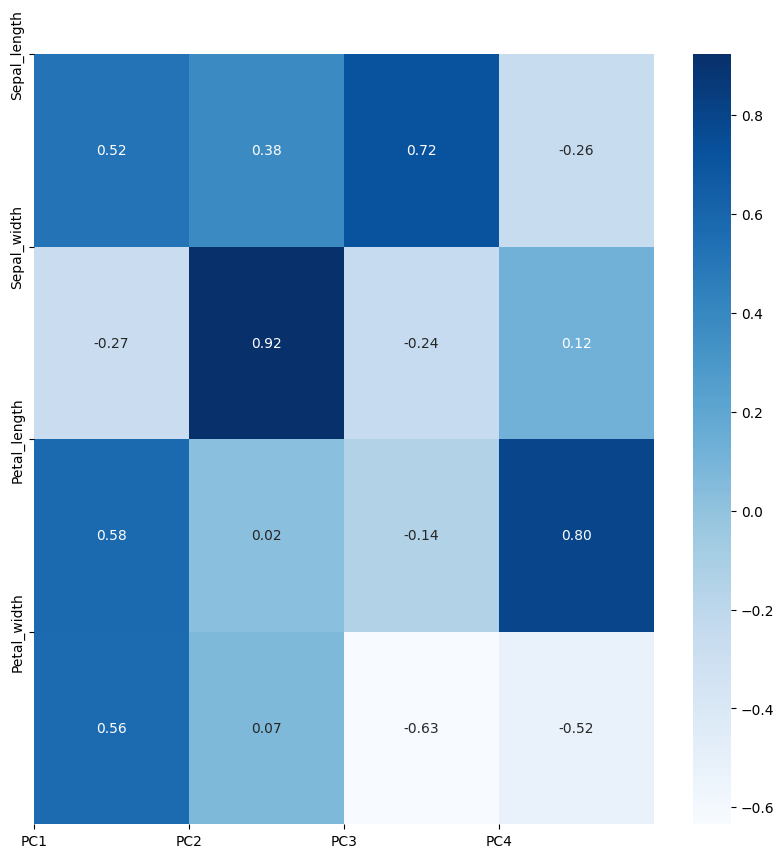

In [36]:
# 고유벡터 시각화 및 변수별 이해
plt.figure(figsize=(10,10))
sns.heatmap(model_pca.components_.T, cmap='Blues', annot=True, fmt='.2f')
plt.xticks([i for i in range(X_pca.shape[1])], colnames)
plt.yticks([i for i in range(X_pca.shape[1])], columns_origin)
plt.show()

In [37]:
# 고유값 순위 = 데이터 설명 분산의 크기
model_pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [38]:
# 고유값 순위 = 데이터 설명 분산의 크기
pd.DataFrame(model_pca.explained_variance_, index=colnames, columns=['Proportion of Variance']).T

,PC1,PC2,PC3,PC4
Proportion of Variance,2.94,0.92,0.15,0.02


In [39]:
# 데이터 설명 분산의 누적 크기
pd.DataFrame(np.cumsum(model_pca.explained_variance_), 
             index=colnames, columns=['Proportion of Variance']).T

,PC1,PC2,PC3,PC4
Proportion of Variance,2.94,3.86,4.01,4.03


In [40]:
# 고유값 순위 = 데이터 설명 분산의 비율
model_pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

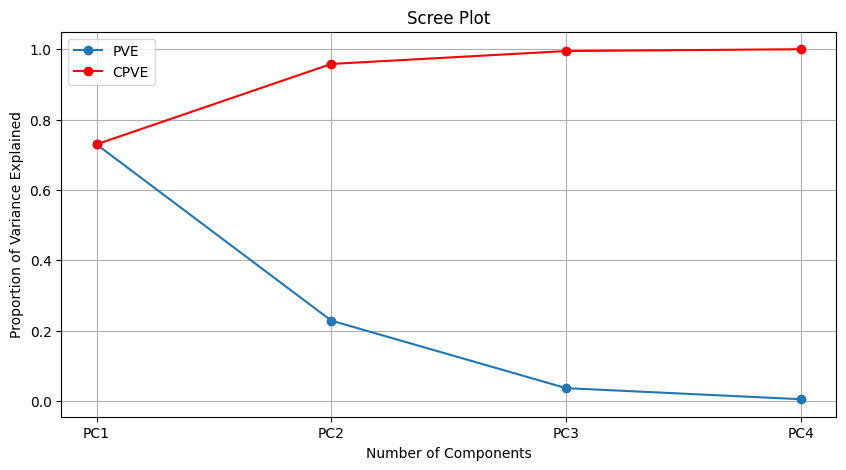

In [41]:
# Scree Plot
plt.figure(figsize=(10,5))
plt.plot(model_pca.explained_variance_ratio_, 'o-', label='PVE')
plt.plot(model_pca.explained_variance_ratio_.cumsum(), 'o-', c='red', label='CPVE')
plt.legend()
plt.title('Scree Plot')
plt.xticks(ticks=list(range(X_pca.shape[1])), labels=colnames)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained')
plt.grid()
plt.show()

In [42]:
# 주성분 데이터 정리
colnames = ['PC'+str(i) for i in range(1, X_pca.shape[1]+1)]
X_pca = pd.DataFrame(X_pca, columns=colnames)
df_pca = pd.concat([Y, X_pca], axis=1)
df_pca

,Target,PC1,PC2,PC3,PC4
0,0,-2.26,0.48,0.13,-0.02
1,0,-2.08,-0.67,0.23,-0.10
2,0,-2.36,-0.34,-0.04,-0.03
3,0,-2.30,-0.60,-0.09,0.07
4,0,-2.39,0.65,-0.02,0.04
...,...,...,...,...,...
145,2,1.87,0.39,-0.26,-0.39
146,2,1.56,-0.90,0.03,-0.22
147,2,1.52,0.27,-0.18,-0.12
148,2,1.37,1.01,-0.93,-0.03


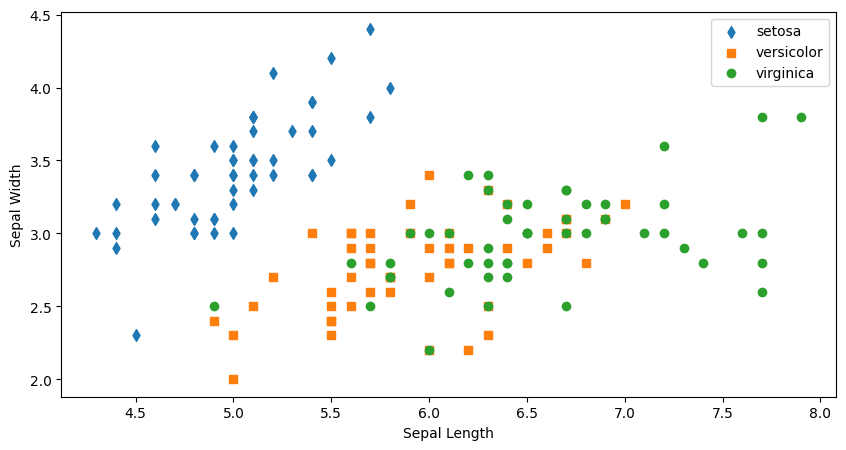

In [43]:
# 원데이터의 Target에 따른 퍼진정도 확인
plt.figure(figsize=(10,5))

markers = ['d','s','o']
for i, marker in enumerate(markers):
    X_sub = df[df['Target']==i]['Sepal_length']
    Y_sub = df[df['Target']==i]['Sepal_width']
    plt.scatter(X_sub, Y_sub, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

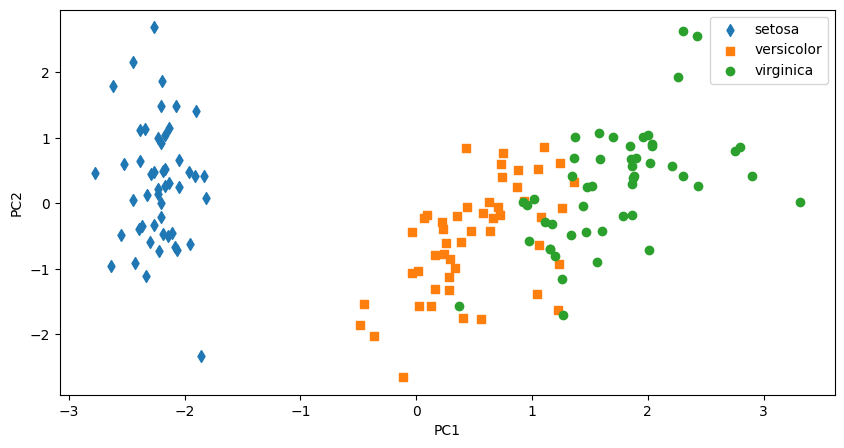

In [44]:
# 차원변환 후 Target에 따른 퍼진정도 확인
plt.figure(figsize=(10,5))

markers = ['d','s','o']
for i, marker in enumerate(markers):
    X_sub = df_pca[df_pca['Target']==i]['PC1']
    Y_sub = df_pca[df_pca['Target']==i]['PC2']
    plt.scatter(X_sub, Y_sub, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### **Principal Component Analysis**

#### 붓꽃분류 데이터

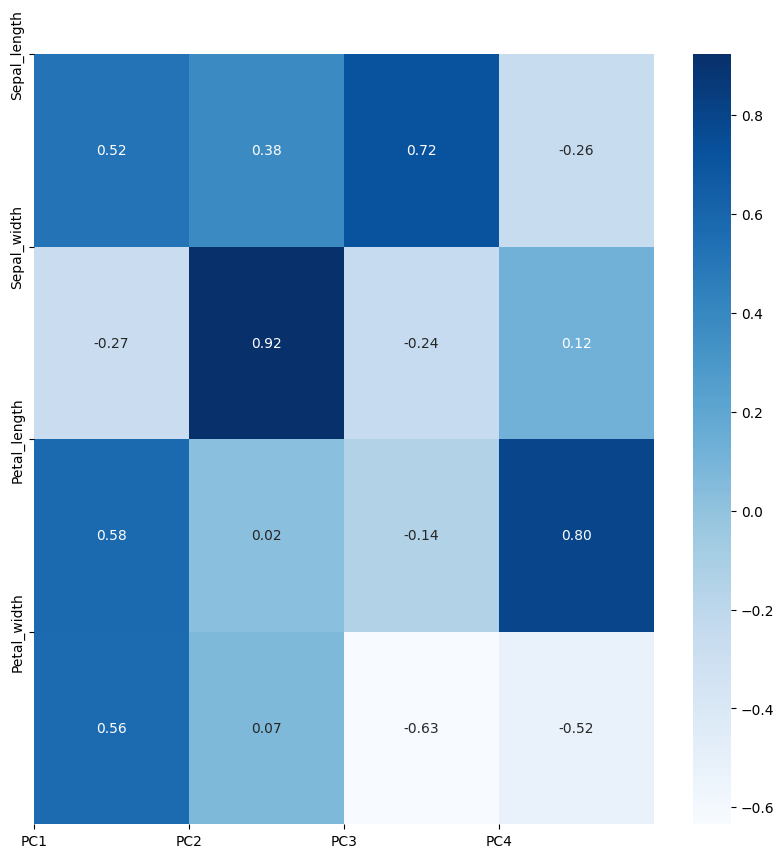

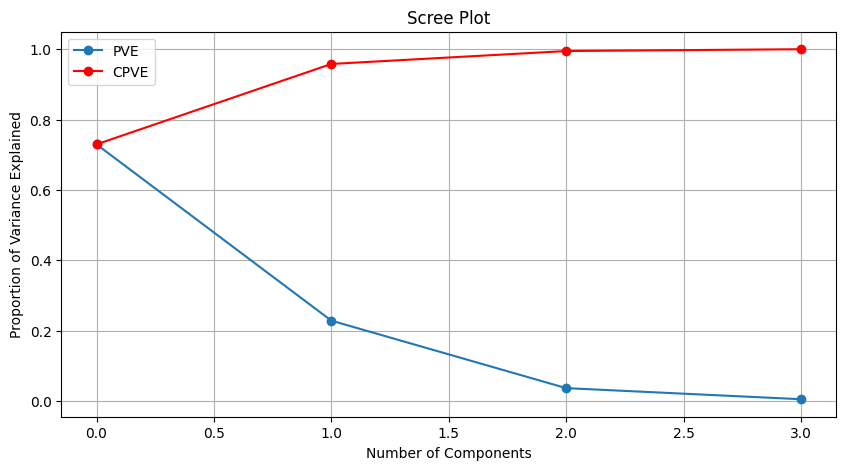

,PC1,PC2,PC3,PC4
0,-2.26,0.48,0.13,-0.02
1,-2.08,-0.67,0.23,-0.10
2,-2.36,-0.34,-0.04,-0.03
3,-2.30,-0.60,-0.09,0.07
4,-2.39,0.65,-0.02,0.04
...,...,...,...,...
145,1.87,0.39,-0.26,-0.39
146,1.56,-0.90,0.03,-0.22
147,1.52,0.27,-0.18,-0.12
148,1.37,1.01,-0.93,-0.03


In [45]:
# 예제 데이터 로딩
iris = load_iris()
columns_origin = ['_'.join(i.split(' (cm)')[0].split(' ')).capitalize() for i in iris.feature_names]
X = pd.DataFrame(iris.data, columns=columns_origin)
Y = pd.DataFrame(iris.target, columns=['Target'])

# 스케일링
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

# 데이터의 주성분 추출
model_pca = PCA(n_components=X.shape[1])
model_pca.fit(X)
X_pca = model_pca.transform(X)

# 고유벡터 시각화 및 변수별 이해
plt.figure(figsize=(10,10))
sns.heatmap(model_pca.components_.T, cmap='Blues', annot=True, fmt='.2f')
colnames = ['PC'+str(i) for i in range(1, X_pca.shape[1]+1)]
plt.xticks([i for i in range(X_pca.shape[1])], colnames)
plt.yticks([i for i in range(X_pca.shape[1])], columns_origin)
plt.show()

# Scree Plot
plt.figure(figsize=(10,5))
plt.plot(model_pca.explained_variance_ratio_, 'o-', label='PVE')
plt.plot(model_pca.explained_variance_ratio_.cumsum(), 'o-', c='red', label='CPVE')
plt.legend()
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained')
plt.grid()
plt.show()

# 주성분 데이터 정리
colnames = ['PC'+str(i) for i in range(1, X_pca.shape[1]+1)]
X_pca = pd.DataFrame(X_pca, columns=colnames)
X_pca

In [46]:
# 데이터의 분포 통계량 확인
X_pca.describe()

,PC1,PC2,PC3,PC4
count,150.00,150.00,150.00,150.00
mean,0.00,0.00,-0.00,-0.00
std,1.71,0.96,0.38,0.14
min,-2.77,-2.65,-1.01,-0.47
25%,-2.10,-0.60,-0.19,-0.09
50%,0.42,0.02,-0.02,-0.01
75%,1.34,0.59,0.26,0.07
max,3.31,2.69,0.86,0.49


In [47]:
# 스케일링
scaler = preprocessing.StandardScaler()
X_pca = scaler.fit_transform(X_pca)
pd.DataFrame(X_pca).describe()

,0,1,2,3
count,150.00,150.00,150.00,150.00
mean,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.62,-2.78,-2.62,-3.26
25%,-1.23,-0.63,-0.51,-0.63
50%,0.24,0.02,-0.06,-0.05
75%,0.79,0.62,0.68,0.52
max,1.94,2.81,2.24,3.40


In [48]:
# 사용할 변수의 갯수
num_feature = 1
X_pca = X_pca[:,:num_feature].copy()

# 모델링
model_kmeans = KMeans(n_clusters=3, random_state=123)
model_kmeans.fit(X_pca)
Y_pred = model_kmeans.predict(X_pca)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

In [49]:
# 성능확인
measures_cluster(np.ravel(Y), X_pca, Y_pred)

,Silhouette,ARI,AMI
Score,0.68,0.80,0.79


In [50]:
# Confusion Matrix 확인
evaluation_class_ConfusionMatrix(Y, Y_pred)

,Pred 0,Pred 1,Pred 2
True 0,0,50,0
True 1,5,0,45
True 2,44,0,6


#### 유방암 생존분류 데이터

In [51]:
# 예제 데이터 로딩
# 예측치 라벨링 순서가 어떻게 될지 몰라서 순서를 맞추기 위해 Y라벨을 오름차순으로 정렬
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
Y = pd.DataFrame(cancer.target, columns=['Target'])
df = pd.concat([Y, X], axis=1).sort_values(by='Target').reset_index().iloc[:,1:]
Y = np.ravel(df['Target'])
X = df.iloc[:,1:]

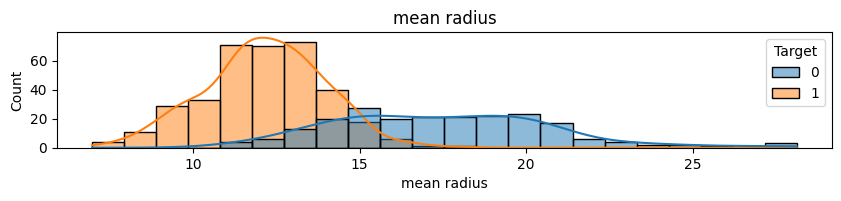

In [52]:
# 변수가 많은 고차원 데이터를 시각화 하는 것은 쉽지 않음
# 분류 여부에 따른 변수별 분포(히스토그램)를 통해 영향력을 확인하는 것이 일반적
for col in X.columns:
    plt.figure(figsize=(10,1.5))
    sns.histplot(data=df, x=col, hue='Target', kde=True)
    plt.title(col)
    plt.show()
    break

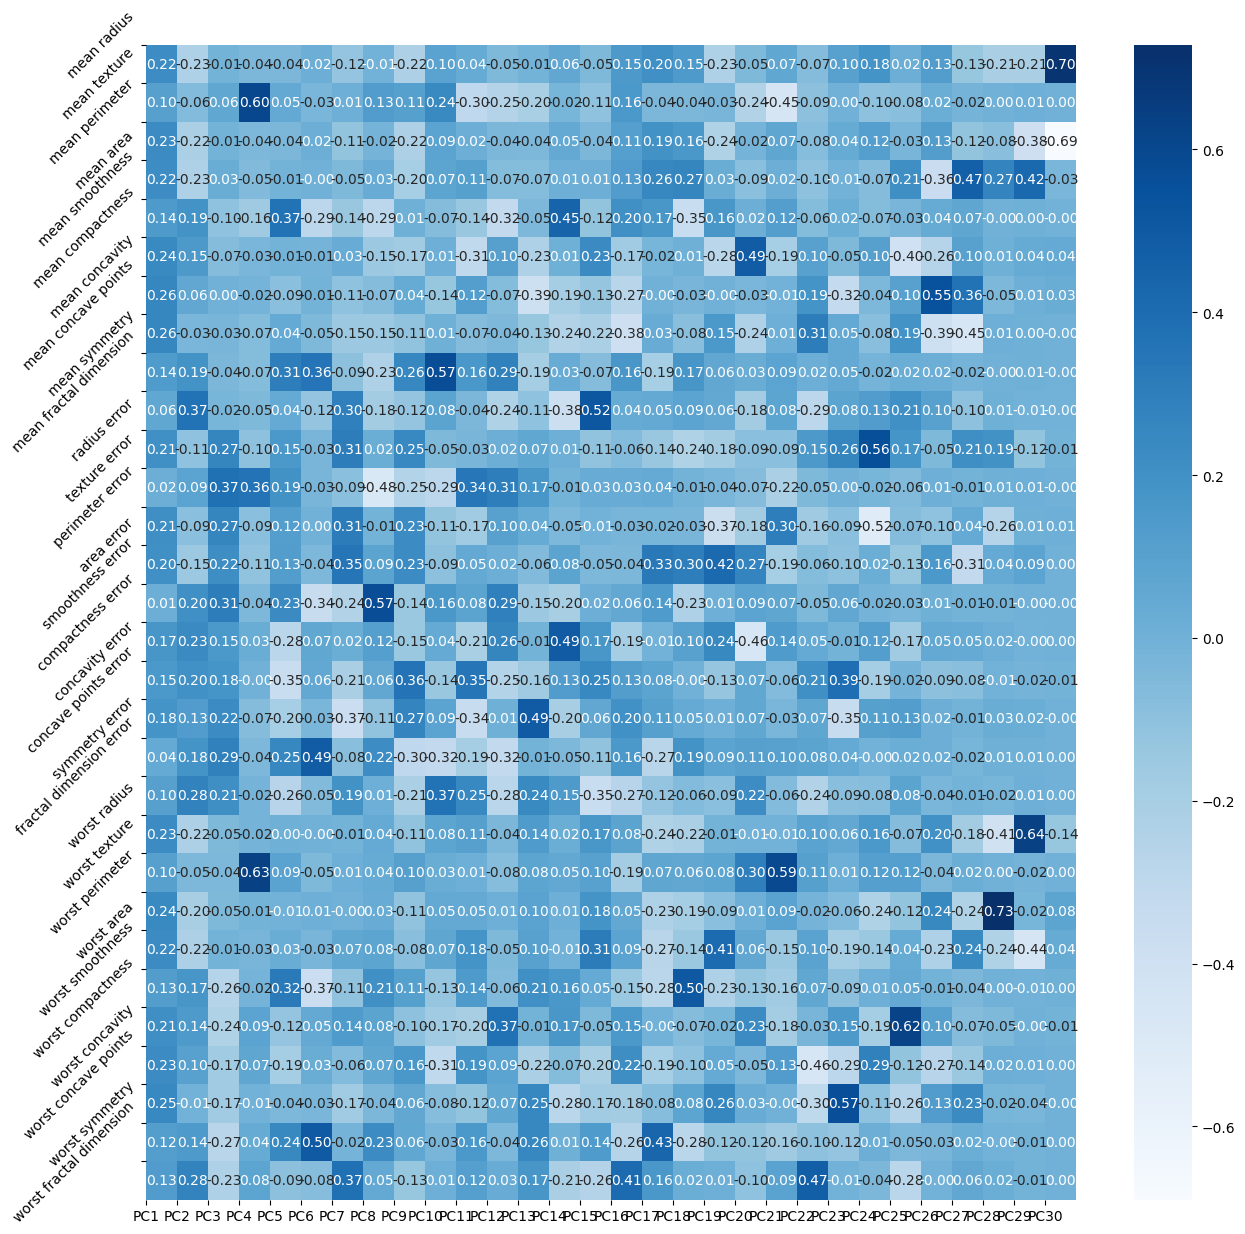

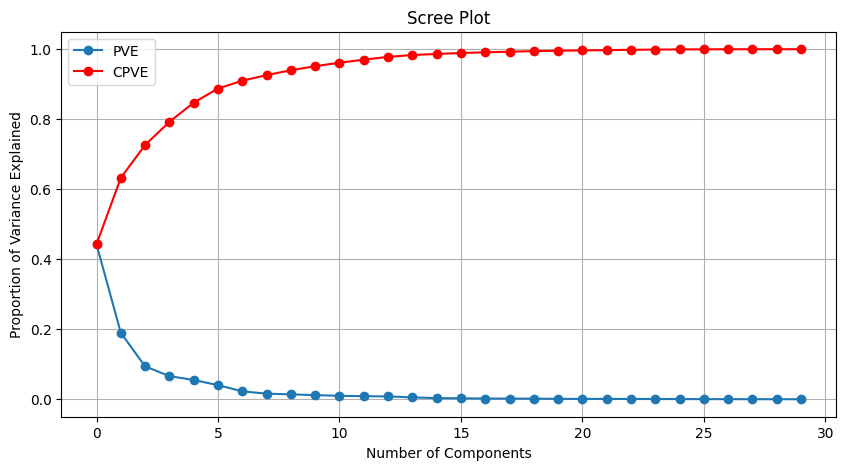

In [53]:
# 스케일링
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

# 데이터의 주성분 추출
model_pca = PCA(n_components=X.shape[1])
model_pca.fit(X)
X_pca = model_pca.transform(X)

# 고유벡터 시각화 및 변수별 이해
plt.figure(figsize=(15,15))
sns.heatmap(model_pca.components_.T, cmap='Blues', annot=True, fmt='.2f')
colnames = ['PC'+str(i) for i in range(1, X_pca.shape[1]+1)]
plt.xticks([i for i in range(X_pca.shape[1])], colnames)
plt.yticks([i for i in range(X_pca.shape[1])], cancer.feature_names, rotation=45)
plt.show()

# Scree Plot
plt.figure(figsize=(10,5))
plt.plot(model_pca.explained_variance_ratio_, 'o-', label='PVE')
plt.plot(model_pca.explained_variance_ratio_.cumsum(), 'o-', c='red', label='CPVE')
plt.legend()
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained')
plt.grid()
plt.show()

# 주성분 데이터 정리
colnames = ['PC'+str(i) for i in range(1, X_pca.shape[1]+1)]
X_pca = pd.DataFrame(X_pca, columns=colnames)

In [54]:
# 데이터의 분포 통계량 확인
X_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,...,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00
std,3.65,2.39,1.68,1.41,1.29,1.10,0.82,0.69,0.65,0.59,...,0.17,0.17,0.16,0.13,0.12,0.09,0.08,0.04,0.03,0.01
min,-5.57,-7.78,-4.88,-5.19,-7.49,-4.22,-4.08,-3.95,-2.97,-2.74,...,-1.12,-1.14,-0.83,-0.57,-0.48,-0.51,-0.30,-0.22,-0.18,-0.07
25%,-2.76,-1.50,-1.02,-0.97,-0.61,-0.73,-0.45,-0.37,-0.32,-0.37,...,-0.09,-0.08,-0.08,-0.07,-0.07,-0.05,-0.04,-0.02,-0.01,-0.01
50%,-1.17,-0.20,-0.16,-0.12,0.03,-0.07,-0.02,0.01,0.01,0.00,...,0.00,0.01,-0.00,-0.01,-0.00,0.01,-0.00,-0.00,-0.00,-0.00
75%,2.51,1.23,0.86,0.79,0.62,0.62,0.45,0.35,0.36,0.33,...,0.10,0.09,0.08,0.07,0.07,0.05,0.04,0.02,0.01,0.01
max,16.32,12.57,10.11,5.13,4.79,5.13,5.42,4.36,3.78,3.19,...,0.74,0.72,0.78,0.64,0.77,0.33,0.39,0.19,0.16,0.05


In [55]:
# 스케일링
scaler = preprocessing.StandardScaler()
X_pca = scaler.fit_transform(X_pca)
pd.DataFrame(X_pca).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,...,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.53,-3.26,-2.91,-3.69,-5.83,-3.84,-4.97,-5.73,-4.60,-4.62,...,-6.47,-6.90,-5.33,-4.24,-3.86,-5.62,-3.64,-5.50,-6.74,-6.36
25%,-0.76,-0.63,-0.61,-0.69,-0.48,-0.66,-0.55,-0.54,-0.50,-0.62,...,-0.49,-0.48,-0.54,-0.49,-0.56,-0.50,-0.53,-0.42,-0.47,-0.47
50%,-0.32,-0.08,-0.09,-0.08,0.02,-0.07,-0.02,0.02,0.02,0.00,...,0.00,0.07,-0.02,-0.04,-0.03,0.06,-0.03,-0.02,-0.07,-0.02
75%,0.69,0.51,0.51,0.56,0.48,0.56,0.55,0.51,0.56,0.55,...,0.55,0.55,0.51,0.50,0.54,0.58,0.52,0.44,0.43,0.45
max,4.48,5.27,6.02,3.65,3.73,4.67,6.59,6.32,5.86,5.39,...,4.26,4.33,5.03,4.77,6.23,3.63,4.67,4.65,5.87,4.09


In [56]:
# 사용할 변수의 갯수
num_feature = 9
X_pca = X_pca[:,:num_feature].copy()

# 모델링
model_kmeans = KMeans(n_clusters=2, random_state=123)
model_kmeans.fit(X_pca)
Y_pred = model_kmeans.predict(X_pca)
Y_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
# 성능확인
measures_cluster(np.ravel(Y), X_pca, Y_pred)

,Silhouette,ARI,AMI
Score,0.16,0.60,0.51


In [58]:
# Confusion Matrix 확인
evaluation_class_ConfusionMatrix(Y, Y_pred)

,Pred 0,Pred 1
True 0,58,154
True 1,351,6


In [59]:
# Classification Report 확인
evaluation_class_ClassificationReport(Y, Y_pred)

              precision    recall  f1-score   support

     class 0       0.14      0.27      0.19       212
     class 1       0.04      0.02      0.02       357

    accuracy                           0.11       569
   macro avg       0.09      0.15      0.11       569
weighted avg       0.08      0.11      0.08       569



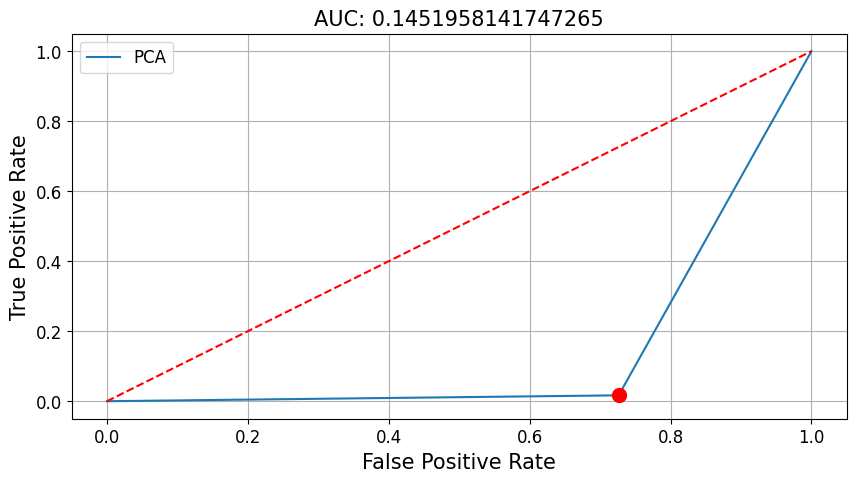

In [60]:
# ROC Curve & AUC 확인
evaluation_class_ROCAUC(Y, Y_pred, label='PCA')

#### 타이타닉 생존분류 데이터

In [61]:
# 데이터 로딩
df = pd.read_csv('./data/Titanic.csv')

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.StandardScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

(712, 11) (712, 1)
(179, 11) (179, 1)


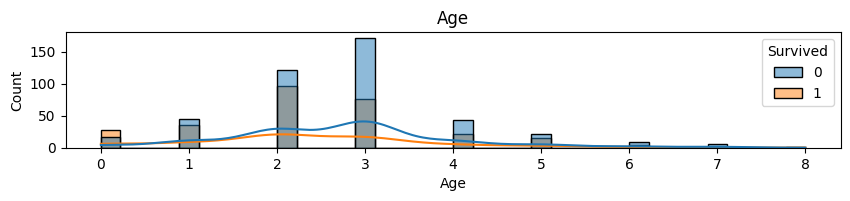

In [62]:
# 변수가 많은 고차원 데이터를 시각화 하는 것은 쉽지 않음
# 분류 여부에 따른 변수별 분포(히스토그램)를 통해 영향력을 확인하는 것이 일반적
for col in X_train_fe.columns:
    if col == 'Age':
        plt.figure(figsize=(10,1.5))
        sns.histplot(data=pd.concat([Y_train, X_train_fe], axis=1), x=col, hue=Y_colname[0], kde=True)
        plt.title(col)
        plt.show()

In [63]:
# 데이터의 주성분 추출
model_pca = PCA(n_components=X_train_fes.shape[1])
model_pca.fit(X_train_fes)
X_train_pca = model_pca.transform(X_train_fes)
X_test_pca = model_pca.transform(X_test_fes)

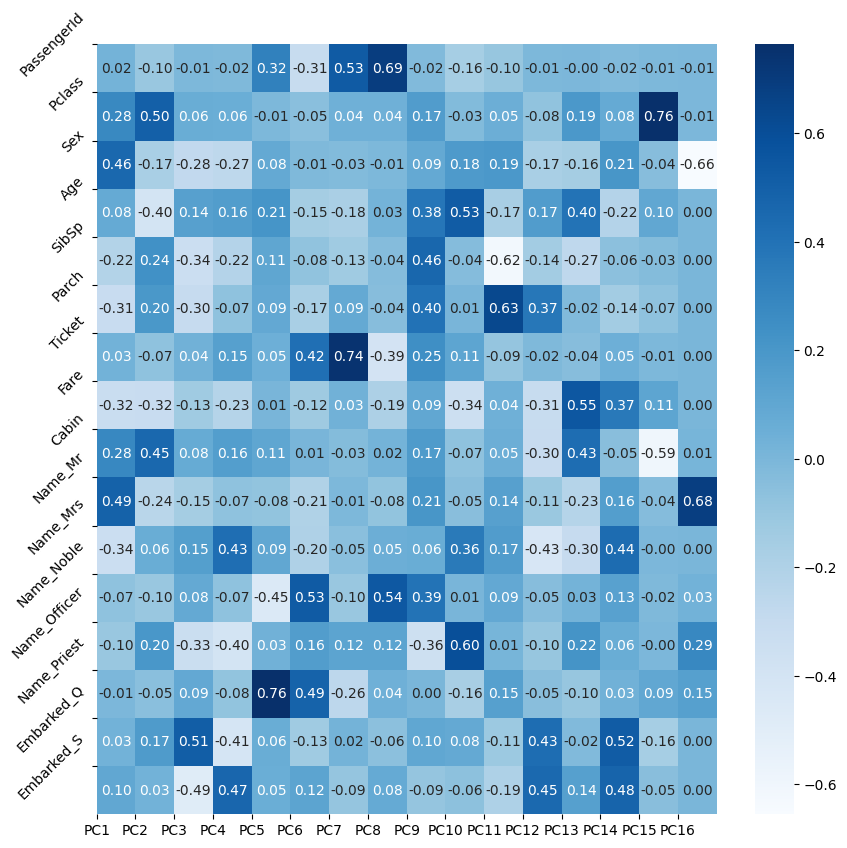

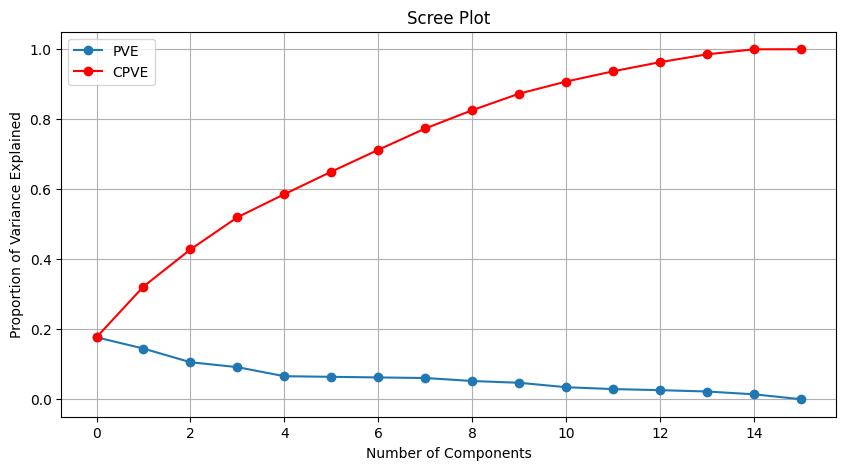

In [64]:
# 고유벡터 시각화 및 변수별 이해
plt.figure(figsize=(10,10))
sns.heatmap(model_pca.components_.T, cmap='Blues', annot=True, fmt='.2f')
colnames = ['PC'+str(i) for i in range(1, X_train_pca.shape[1]+1)]
plt.xticks([i for i in range(X_train_pca.shape[1])], colnames)
plt.yticks([i for i in range(X_train_pca.shape[1])], X_train_fes.columns, rotation=45)
plt.show()

# Scree Plot
plt.figure(figsize=(10,5))
plt.plot(model_pca.explained_variance_ratio_, 'o-', label='PVE')
plt.plot(model_pca.explained_variance_ratio_.cumsum(), 'o-', c='red', label='CPVE')
plt.legend()
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained')
plt.grid()
plt.show()

# 주성분 데이터 정리
colnames = ['PC'+str(i) for i in range(1, X_train_pca.shape[1]+1)]
X_train_pca = pd.DataFrame(X_train_pca, columns=colnames)
X_test_pca = pd.DataFrame(X_test_pca, columns=colnames)

In [65]:
# 데이터의 분포 통계량 확인
X_train_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
count,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00
mean,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.68,1.52,1.30,1.21,1.03,1.01,1.00,0.99,0.92,0.87,0.74,0.68,0.65,0.60,0.48,0.07
min,-4.81,-5.74,-4.95,-5.05,-6.77,-2.63,-3.46,-2.80,-3.04,-3.22,-3.28,-3.21,-1.86,-1.78,-1.57,-0.99
25%,-1.35,-0.72,-0.54,-0.59,-0.36,-0.50,-0.60,-0.64,-0.47,-0.47,-0.40,-0.30,-0.35,-0.35,-0.33,-0.01
50%,0.32,0.15,-0.30,0.26,-0.05,-0.13,-0.08,-0.01,-0.05,-0.07,-0.01,-0.02,-0.03,0.10,0.17,0.00
75%,1.58,0.91,0.58,0.64,0.25,0.24,0.51,0.60,0.42,0.42,0.31,0.44,0.30,0.34,0.31,0.01
max,2.02,4.03,3.80,2.69,8.17,7.67,3.61,7.99,5.08,4.62,3.91,2.16,5.59,2.53,1.37,1.31


In [66]:
# 스케일링
scaler = preprocessing.StandardScaler()
X_train_pca, X_test_pca = scale(scaler, X_train_pca, X_test_pca)
pd.DataFrame(X_train_pca).describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
count,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00
mean,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.86,-3.77,-3.80,-4.16,-6.59,-2.60,-3.46,-2.84,-3.33,-3.70,-4.41,-4.69,-2.88,-2.98,-3.28,-14.87
25%,-0.80,-0.47,-0.42,-0.49,-0.35,-0.49,-0.60,-0.65,-0.51,-0.55,-0.54,-0.45,-0.55,-0.59,-0.69,-0.13
50%,0.19,0.10,-0.23,0.22,-0.05,-0.13,-0.08,-0.01,-0.06,-0.08,-0.01,-0.02,-0.05,0.16,0.36,0.00
75%,0.94,0.60,0.45,0.53,0.24,0.24,0.51,0.61,0.46,0.48,0.41,0.65,0.46,0.57,0.66,0.11
max,1.20,2.65,2.92,2.22,7.95,7.57,3.61,8.10,5.56,5.32,5.25,3.16,8.64,4.24,2.87,19.60


In [67]:
# 사용할 변수의 갯수
num_feature = 3
X_train_pca = X_train_pca.iloc[:,:num_feature].copy()
X_test_pca = X_test_pca.iloc[:,:num_feature].copy()

# 모델링
model_kmeans = KMeans(n_clusters=2, random_state=123)
model_kmeans.fit(X_train_pca)
Y_trpred = model_kmeans.predict(X_train_pca)
Y_tepred = model_kmeans.predict(X_test_pca)

In [68]:
# 성능확인
measures_cluster(np.ravel(Y_test), X_test_pca, Y_tepred)

,Silhouette,ARI,AMI
Score,0.34,0.21,0.13


In [69]:
# Confusion Matrix 확인
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

,Pred 0,Pred 1
True 0,99,15
True 1,32,33


In [70]:
# Classification Report 확인
evaluation_class_ClassificationReport(Y_test, Y_tepred)

              precision    recall  f1-score   support

     class 0       0.76      0.87      0.81       114
     class 1       0.69      0.51      0.58        65

    accuracy                           0.74       179
   macro avg       0.72      0.69      0.70       179
weighted avg       0.73      0.74      0.73       179



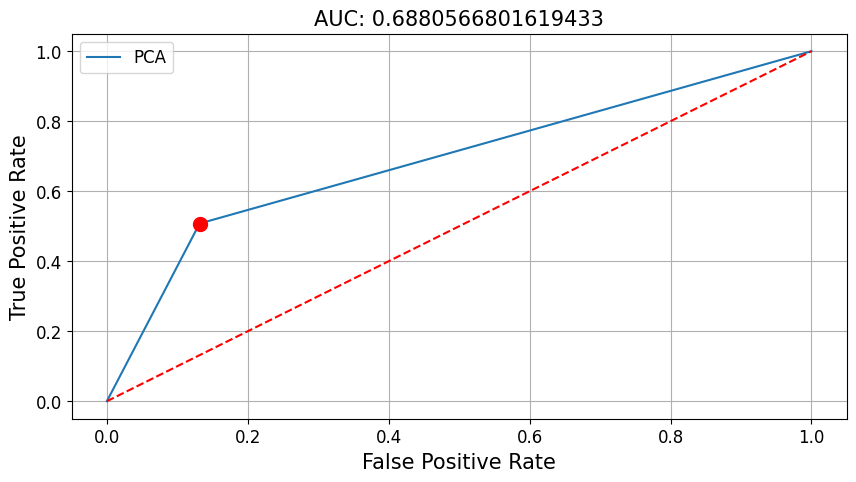

In [71]:
# ROC Curve & AUC 확인
evaluation_class_ROCAUC(Y_test, Y_tepred, label='PCA')